<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Assignment 1 </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

In [1]:
# import the pacakges

import pandas as pd
import numpy as np

# sklearn preprocess
from sklearn.model_selection import train_test_split

# feature engine
import feature_engine.imputation as mdi
from feature_engine.encoding import OneHotEncoder, MeanEncoder, OrdinalEncoder
from feature_engine.discretisation import EqualFrequencyDiscretiser
from feature_engine.transformation import LogTransformer
from feature_engine.transformation import ReciprocalTransformer
from feature_engine.transformation import PowerTransformer
from feature_engine.transformation import BoxCoxTransformer
from feature_engine.encoding import CountFrequencyEncoder

# to impute missing data with feature-engine
from feature_engine.imputation import EndTailImputer

# Visual
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# to impute missing data with feature-engine
from feature_engine.imputation import ArbitraryNumberImputer

# for discretization
from sklearn.preprocessing import KBinsDiscretizer
from feature_engine.discretisation import EqualWidthDiscretiser

# the scaler - for standardization
from sklearn.preprocessing import StandardScaler

# for linear regression
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error

### Step 1: Load Data into Jupyter Notebook

In [2]:
# load the dataset and show the info of dataset
data = pd.read_csv('supermarket.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Step 2: Data Preprocessing (Part 1)

In [5]:
# find categorical variables
cat_cols = [c for c in data.columns if data[c].dtypes =='O']
data[cat_cols].isnull().mean().sort_values()

Item_Identifier         0.000000
Item_Fat_Content        0.000000
Item_Type               0.000000
Outlet_Identifier       0.000000
Outlet_Location_Type    0.000000
Outlet_Type             0.000000
Outlet_Size             0.282764
dtype: float64

In [6]:
# find numerical variables
num_cols = [n for n in data.columns if data[n].dtypes !='O']
data[num_cols].isnull().mean().sort_values()

Item_Visibility              0.000000
Item_MRP                     0.000000
Outlet_Establishment_Year    0.000000
Item_Outlet_Sales            0.000000
Item_Weight                  0.171653
dtype: float64

In [7]:
data[num_cols].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
data[cat_cols].describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [9]:
data[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Visibility            8523 non-null   float64
 2   Item_MRP                   8523 non-null   float64
 3   Outlet_Establishment_Year  8523 non-null   int64  
 4   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 333.1 KB


In [10]:
data[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Item_Identifier       8523 non-null   object
 1   Item_Fat_Content      8523 non-null   object
 2   Item_Type             8523 non-null   object
 3   Outlet_Identifier     8523 non-null   object
 4   Outlet_Size           6113 non-null   object
 5   Outlet_Location_Type  8523 non-null   object
 6   Outlet_Type           8523 non-null   object
dtypes: object(7)
memory usage: 466.2+ KB


#### Outliers <a id="Outliers"></a>

<AxesSubplot:ylabel='Item_MRP'>

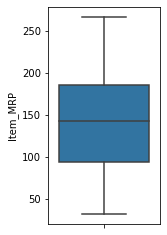

In [11]:
plt.figure(figsize=(2, 4))
sns.boxplot(y=data['Item_MRP'])

<AxesSubplot:ylabel='Outlet_Establishment_Year'>

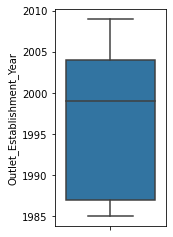

In [12]:
plt.figure(figsize=(2, 4))
sns.boxplot(y=data['Outlet_Establishment_Year'])

<AxesSubplot:ylabel='Item_Weight'>

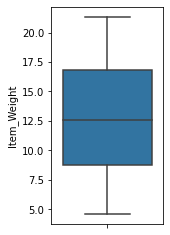

In [13]:
plt.figure(figsize=(2, 4))
sns.boxplot(y=data['Item_Weight'])

<AxesSubplot:ylabel='Item_Visibility'>

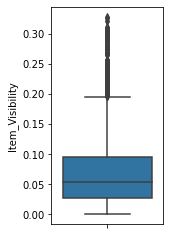

In [14]:
plt.figure(figsize=(2, 4))
sns.boxplot(y=data['Item_Visibility'])
# there is outliers

<AxesSubplot:ylabel='Item_Outlet_Sales'>

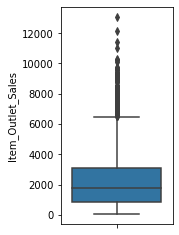

In [15]:
plt.figure(figsize=(2, 4))
sns.boxplot(y=data['Item_Outlet_Sales'])
# there is outliers

## By outlier_trimming

In [16]:
def find_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

#### for Item_Visibility

In [17]:
# find limits for Item_Visibility

RM_upper_limit, RM_lower_limit = find_boundaries(data, 'Item_Visibility', 1.5)
RM_upper_limit, RM_lower_limit

(0.195979015, -0.07440424500000001)

In [18]:
# let's flag the outliers in the data set

outliers_ItemVisbility = np.where(data['Item_Visibility'] > RM_upper_limit, True,
                       np.where(data['Item_Visibility'] < RM_lower_limit, True, False))

In [19]:
# let's trim the dataset by removing only Item_Visbility outliers

data_trimmed = data.loc[~outliers_ItemVisbility]

data.shape, data_trimmed.shape

((8523, 12), (8379, 12))

<AxesSubplot:ylabel='Item_Visibility'>

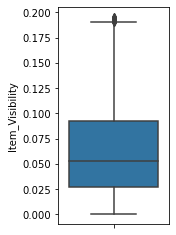

In [20]:
plt.figure(figsize=(2, 4))
sns.boxplot(y=data_trimmed['Item_Visibility'])

#### for Item_Outlet_Sales

In [21]:
# find limits for Item_Outlet_Sales

RM_upper_limit, RM_lower_limit = find_boundaries(data, 'Item_Outlet_Sales', 1.5)
RM_upper_limit, RM_lower_limit

(6501.8699, -2566.3261)

In [22]:
# let's flag the outliers in the data set

outliers_ItemOutletSales = np.where(data['Item_Outlet_Sales'] > RM_upper_limit, True,
                       np.where(data['Item_Outlet_Sales'] < RM_lower_limit, True, False))

In [23]:
# let's trim the dataset by removing only Item_Outlet_Sales outliers

data_trimmed = data.loc[~outliers_ItemOutletSales]

data.shape, data_trimmed.shape

((8523, 12), (8337, 12))

<AxesSubplot:ylabel='Item_Outlet_Sales'>

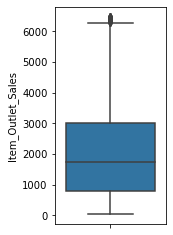

In [24]:
plt.figure(figsize=(2, 4))
sns.boxplot(y=data_trimmed['Item_Outlet_Sales'])

### Step 3: Train and Test Split

In [25]:
X_train_student_final_premodel_version, X_test_student_final_premodel_version, y_train_student_final_premodel_version, y_test_student_final_premodel_version = train_test_split(
    data_trimmed.drop('Item_Outlet_Sales', axis = 1), data_trimmed['Item_Outlet_Sales'], test_size=0.3, random_state=0)

X_train_student_final_premodel_version.shape, X_test_student_final_premodel_version.shape

((5835, 11), (2502, 11))

### Step 4: Missing Value Imputation

In [26]:
# find the percentage of missing data per variable for X_train

X_train_student_final_premodel_version.isnull().mean()


Item_Identifier              0.000000
Item_Weight                  0.166067
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Size                  0.280206
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
dtype: float64

In [27]:
# let's create a median imputer for numerical variable, Item_Weight

# IQR limits -> right tail -> Q3 + 1.5*IQR
imputer = EndTailImputer(imputation_method='iqr', tail='right', fold =1.5, 
                         variables=['Item_Weight'])

imputer.fit(X_train_student_final_premodel_version)

EndTailImputer(fold=1.5, imputation_method='iqr', variables=['Item_Weight'])

In [28]:
# dictionary with the mappings for each variable
imputer.imputer_dict_ # Q3 + 3*IQR

{'Item_Weight': 28.838750000000005}

In [29]:
# transform the data
X_train_student_final_premodel_version = imputer.transform(X_train_student_final_premodel_version)
X_test_student_final_premodel_version = imputer.transform(X_test_student_final_premodel_version)

In [30]:
# check that null values were replaced
X_train_student_final_premodel_version[['Item_Weight']].isnull().mean()

Item_Weight    0.0
dtype: float64

In [31]:
# replace NA in categorical variables

for var in ['Outlet_Size']:
    
    value = X_train_student_final_premodel_version[var].mode()[0]
    print(value)

    X_train_student_final_premodel_version[var] = X_train_student_final_premodel_version[var].fillna(value)
    X_test_student_final_premodel_version[var] = X_test_student_final_premodel_version[var].fillna(value)

Medium


In [32]:
# check absence of missing values in imputed variables

X_train_student_final_premodel_version[['Item_Weight', 'Outlet_Size']].isnull().mean()

Item_Weight    0.0
Outlet_Size    0.0
dtype: float64

In [33]:
X_train_student_final_premodel_version.isnull().mean()

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
dtype: float64

### Step 2: Data Preprocessing (Part 2)

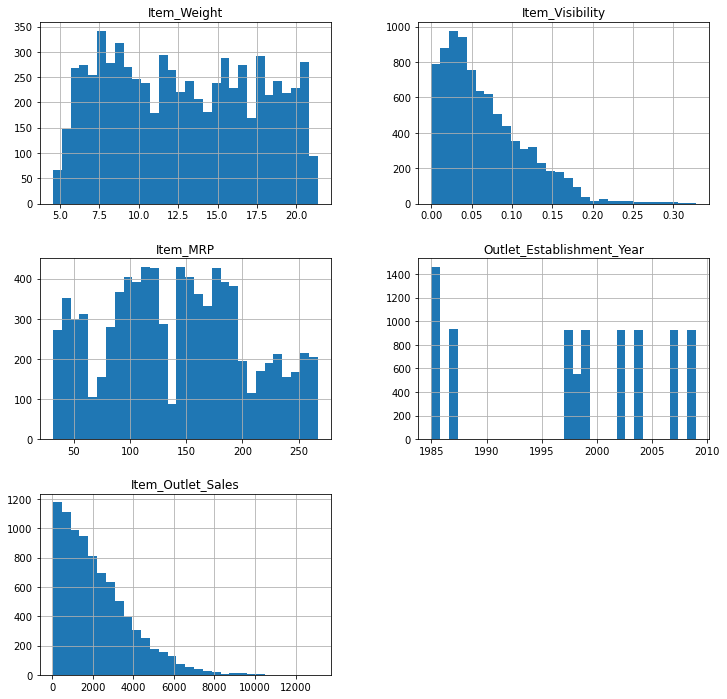

In [34]:
# The distribution of the numerical variables? 

# plot the histogram to the num variables
data[num_cols].hist(bins=30, figsize=(12,12))
plt.show()

In [35]:
# Heat map
data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


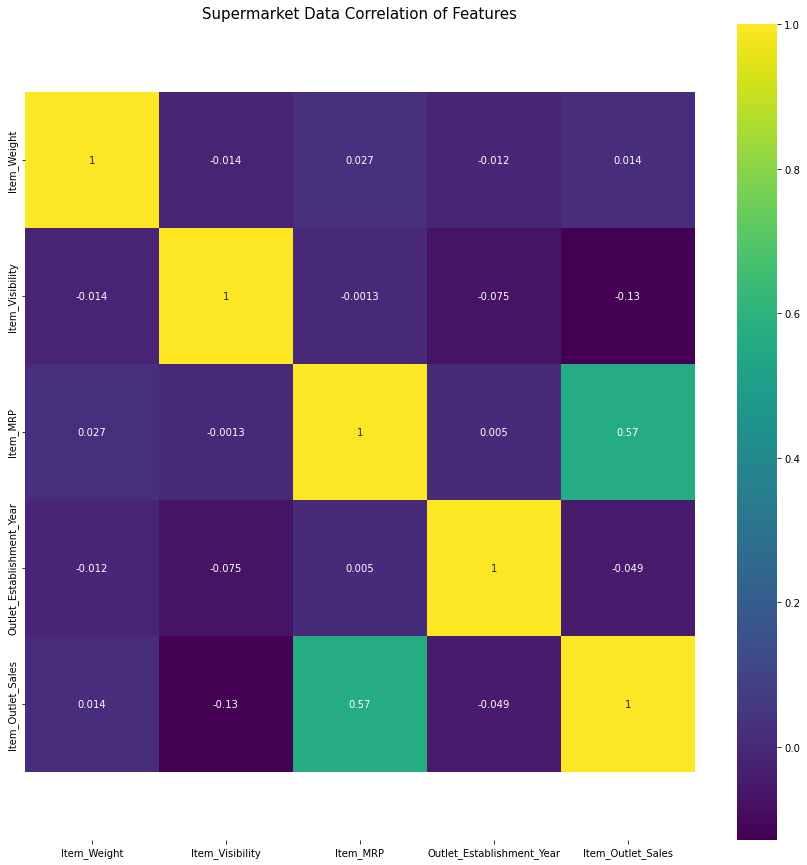

In [36]:
colormap = plt.cm.viridis
plt.figure(figsize=(15,15))
plt.title('Supermarket Data Correlation of Features', size=15)
ax = sns.heatmap(data.corr(), cmap=colormap, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [37]:
# plot histogram and Q-Q plots to have a look at the variable distribution

def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

### Cube root Transformations with Feature Engine <a id="FirstTransformation"></a>

[back to report](#NumericalData)

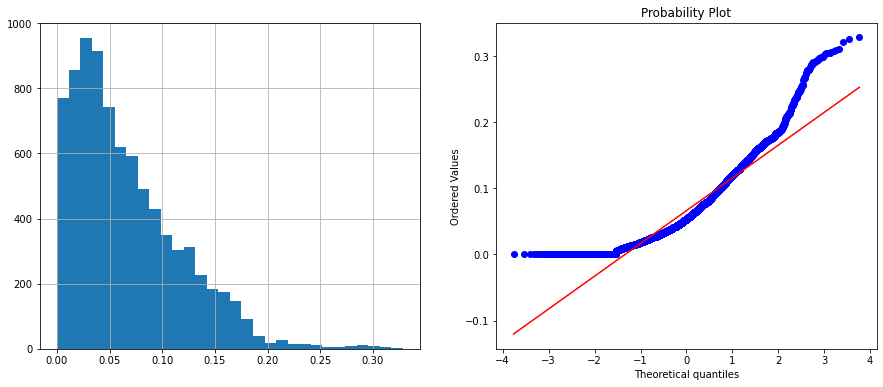

In [38]:
# Numerical Variable Transformation

# check original distribution
diagnostic_plots(data_trimmed, 'Item_Visibility')

# not a normal distribution, rightly-skewed

In [39]:
# set up PowerTransformer with the square root exponent
et = PowerTransformer(variables = ['Item_Visibility'], exp=1/3) # for cube root

# fit transformer to data 
et.fit(data_trimmed)

PowerTransformer(exp=0.3333333333333333, variables=['Item_Visibility'])

In [40]:
# transform indicated variables within our dataframe
data_tf = et.transform(data_trimmed)

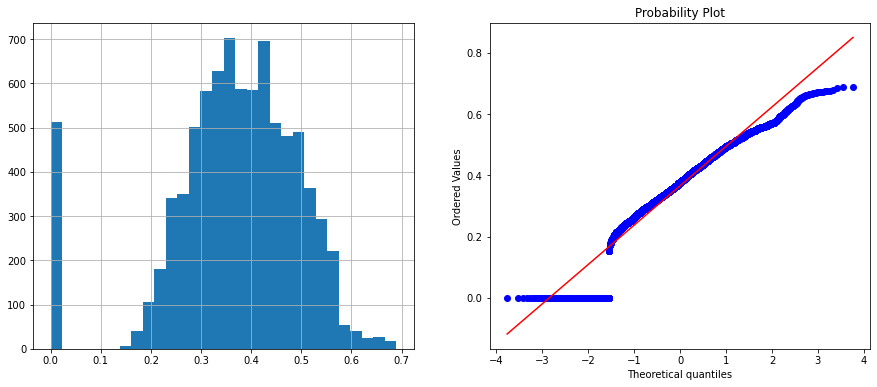

In [41]:
# visualize the trasnformation

diagnostic_plots(data_tf, 'Item_Visibility')

### Reciprocal Transformations with Feature Engine <a id="SecondTransformation"></a>

[back to report](#NumericalData)

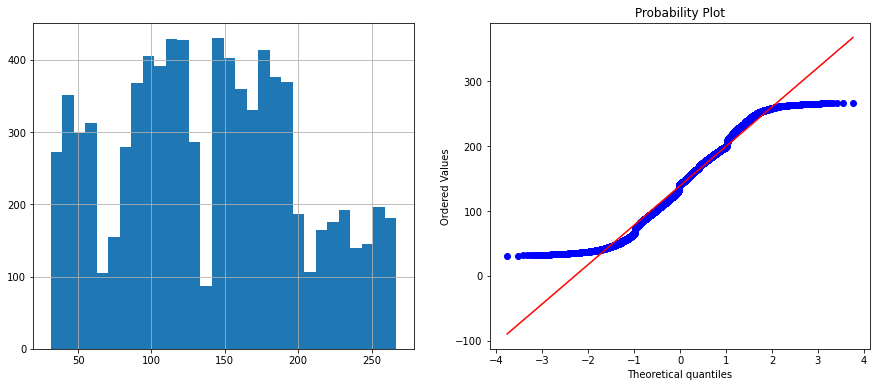

In [42]:
# check original distribution
diagnostic_plots(data_trimmed, 'Item_MRP')
# somwhat symatrical

In [43]:
# initialize the transformer
rt = ReciprocalTransformer(variables = ['Item_MRP'])

# fit transformer to the entire dataframe
rt.fit(data_trimmed)

ReciprocalTransformer(variables=['Item_MRP'])

In [44]:
# transform the indicated variables within our data set
data_tf = rt.transform(data_trimmed)

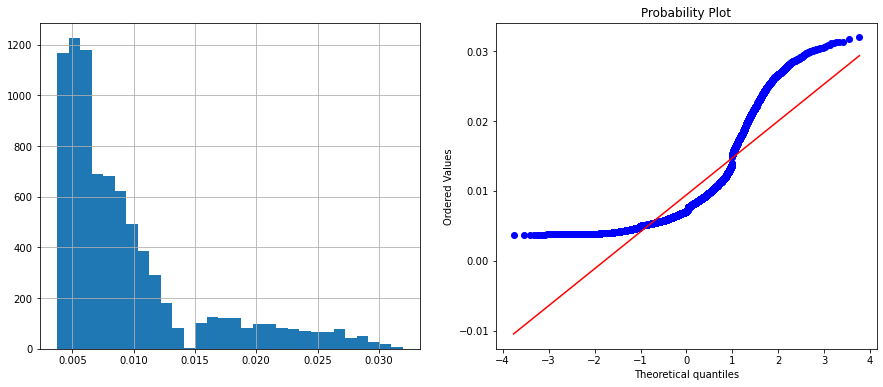

In [45]:
# use diagnostic plot function to evaluate transformation

diagnostic_plots(data_tf, 'Item_MRP')

### Box-Cox transformation with Feature Engine <a id="LastTransformation"></a>

[back to report](#NumericalData)

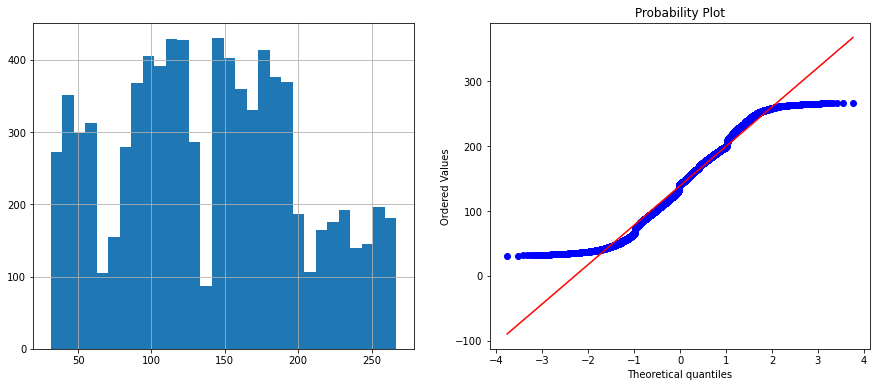

In [46]:
# check original distribution
diagnostic_plots(data_trimmed,'Item_MRP') 
# symmetrical

In [47]:
# initialize the transformer with variables to transform
bct = BoxCoxTransformer(variables = ['Item_MRP'])

# fit transformer to the data set
bct.fit(data_trimmed)

BoxCoxTransformer(variables=['Item_MRP'])

In [48]:
# transform the indicated variables in our dataframe
# returns a new dataframe

data_tf = bct.transform(data_trimmed)

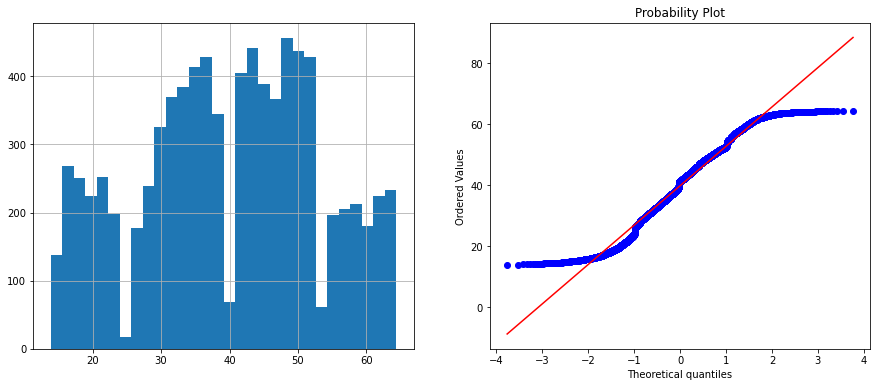

In [49]:
# visualize the distribution
diagnostic_plots(data_tf, 'Item_MRP')

### Step 5: Categorical Data Encoding <a id="CategoricalDataRunThrough"></a>

In [ ]:
[back to report](#CategoricalData)

#### Using One Hot Encoding

In [50]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [51]:
# let's create the encoder
from feature_engine.encoding import OneHotEncoder

ohe_enc = OneHotEncoder(
    top_categories=None,
    drop_last=False)  # to return k-1, false to return k 

In [52]:
ohe_enc.fit(X_train_student_final_premodel_version)

OneHotEncoder()

In [53]:
# see which variables the encoder will encode

ohe_enc.variables_

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [54]:
X_train_student_final_premodel_version = ohe_enc.transform(X_train_student_final_premodel_version)
X_test_student_final_premodel_version = ohe_enc.transform(X_test_student_final_premodel_version)

X_train_student_final_premodel_version.head()

C:\ProgramData\Anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:236: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  X[str(feature) + "_" + str(category)] = np.where(


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_NCP05,Item_Identifier_FDW46,Item_Identifier_FDE56,Item_Identifier_NCP06,Item_Identifier_FDQ34,Item_Identifier_FDB28,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_High,Outlet_Location_Type_Tier 3,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 1,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type3
7569,19.60000,0.042325,150.9024,1998,1,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
891,13.00000,0.070588,65.9484,2009,0,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1629,17.25000,0.160096,61.5194,2007,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
6195,20.70000,0.039468,151.7366,2007,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
2613,28.83875,0.284066,105.5622,1985,0,0,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0


In [55]:
X_test_student_final_premodel_version.head() # encoded test set

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_NCP05,Item_Identifier_FDW46,Item_Identifier_FDE56,Item_Identifier_NCP06,Item_Identifier_FDQ34,Item_Identifier_FDB28,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_High,Outlet_Location_Type_Tier 3,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 1,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type3
8491,10.39500,0.037033,227.9352,2009,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
2377,12.35000,0.033761,196.9426,1997,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
526,8.60000,0.032754,140.5154,2009,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
8056,16.20000,0.050546,191.6162,2009,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1689,28.83875,0.048546,60.1194,1985,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1


### Step 6: Variable Discretization /Binning

In [56]:
# let's set up an equal-width discretizer into 10 intervals

disc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')

# let's fit the discretizer so it learns the interval limits
disc.fit(X_train_student_final_premodel_version[['Item_MRP', 'Outlet_Establishment_Year', 'Item_Visibility', 'Item_Weight']])

KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='uniform')

In [57]:
# the interval limits are stored in the bin_edges_attribute

disc.bin_edges_ # same as interval limits

array([array([ 31.29   ,  54.84984,  78.40968, 101.96952, 125.52936, 149.0892 ,
              172.64904, 196.20888, 219.76872, 243.32856, 266.8884 ])          ,
       array([1985. , 1987.4, 1989.8, 1992.2, 1994.6, 1997. , 1999.4, 2001.8,
              2004.2, 2006.6, 2009. ])                                       ,
       array([0.        , 0.03283909, 0.06567819, 0.09851728, 0.13135638,
              0.16419547, 0.19703457, 0.22987366, 0.26271276, 0.29555185,
              0.32839095])                                               ,
       array([ 4.555   ,  6.983375,  9.41175 , 11.840125, 14.2685  , 16.696875,
              19.12525 , 21.553625, 23.982   , 26.410375, 28.83875 ])          ],
      dtype=object)

In [58]:
# let's transform the train set, remember that Sklearn returns Numpy arrays
train_t = disc.transform(X_train_student_final_premodel_version[['Item_MRP', 'Outlet_Establishment_Year', 'Item_Visibility', 'Item_Weight']])

# transform array to dataframe
train_t = pd.DataFrame(train_t, columns = ['Item_MRP', 'Outlet_Establishment_Year', 'Item_Visibility', 'Item_Weight'])

train_t.head()

,Item_MRP,Outlet_Establishment_Year,Item_Visibility,Item_Weight
0,5.0,5.0,1.0,6.0
1,1.0,9.0,2.0,3.0
2,1.0,9.0,4.0,5.0
3,5.0,9.0,1.0,6.0
4,3.0,0.0,8.0,9.0


In [59]:
# same thing for test set

test_t = disc.transform(X_test_student_final_premodel_version[['Item_MRP', 'Outlet_Establishment_Year', 'Item_Visibility', 'Item_Weight']])

test_t = pd.DataFrame(test_t, columns = ['Item_MRP', 'Outlet_Establishment_Year', 'Item_Visibility', 'Item_Weight'])

#### Item_MRP <a id="ItemMRP"></a>

[back to report](#NumericalData)

Text(0, 0.5, 'Number of observations per bin')

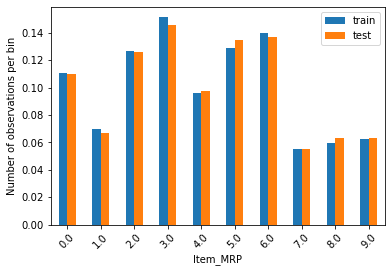

In [60]:
# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set

t1 = train_t.groupby(['Item_MRP'])['Item_MRP'].count() / len(train_t)
t2 = test_t.groupby(['Item_MRP'])['Item_MRP'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')

#### Outlet_Establishment_Year <a id="OutletYear"></a>

[back to report](#NumericalData)

Text(0, 0.5, 'Number of observations per bin')

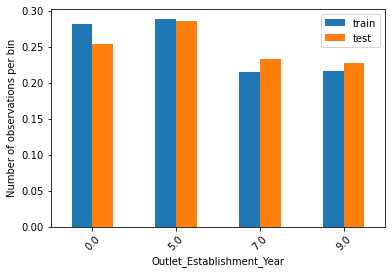

In [61]:
t1 = train_t.groupby(['Outlet_Establishment_Year'])['Outlet_Establishment_Year'].count() / len(train_t)
t2 = test_t.groupby(['Outlet_Establishment_Year'])['Outlet_Establishment_Year'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')

#### Item_Visibility <a id="ItemVisibility"></a>

[back to report](#NumericalData)

Text(0, 0.5, 'Number of observations per bin')

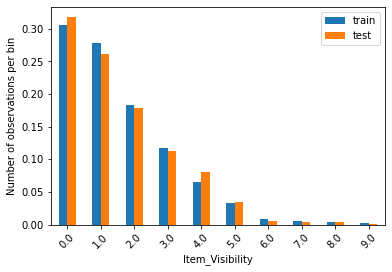

In [62]:
t1 = train_t.groupby(['Item_Visibility'])['Item_Visibility'].count() / len(train_t)
t2 = test_t.groupby(['Item_Visibility'])['Item_Visibility'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')

#### Item_Weight <a id="ItemWeight"></a>

[back to report](#NumericalData)

Text(0, 0.5, 'Number of observations per bin')

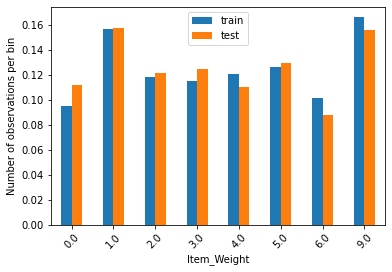

In [63]:
t1 = train_t.groupby(['Item_Weight'])['Item_Weight'].count() / len(train_t)
t2 = test_t.groupby(['Item_Weight'])['Item_Weight'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')

### Step 7: Feature Engineer

#### Using Mean-normalization <a id="meanNormal"></a>

[back to report](#FeatureEngineer)

In [64]:
numCols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

In [65]:
# mean of the train set

means = X_train_student_final_premodel_version.mean(axis=0)
means

Item_Weight                        15.577683
Item_Visibility                     0.066253
Item_MRP                          138.819420
Outlet_Establishment_Year        1997.812339
Item_Identifier_NCP05               0.001028
                                    ...     
Outlet_Location_Type_Tier 1         0.286889
Outlet_Type_Grocery Store           0.134362
Outlet_Type_Supermarket Type2       0.111054
Outlet_Type_Supermarket Type1       0.655184
Outlet_Type_Supermarket Type3       0.099400
Length: 1586, dtype: float64

In [66]:
ranges = X_train_student_final_premodel_version[numCols].max(axis=0) - X_train_student_final_premodel_version[numCols].min(axis=0)
ranges

Item_Weight                   24.283750
Item_Visibility                0.328391
Item_MRP                     235.598400
Outlet_Establishment_Year     24.000000
dtype: float64

In [67]:
X_train_scaled = (X_train_student_final_premodel_version - means) / ranges
X_test_scaled = (X_test_student_final_premodel_version - means) / ranges

In [68]:
X_train_student_final_premodel_version.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_NCP05,Item_Identifier_FDW46,Item_Identifier_FDE56,Item_Identifier_NCP06,Item_Identifier_FDQ34,Item_Identifier_FDB28,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_High,Outlet_Location_Type_Tier 3,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 1,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type3
7569,19.60000,0.042325,150.9024,1998,1,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
891,13.00000,0.070588,65.9484,2009,0,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1629,17.25000,0.160096,61.5194,2007,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
6195,20.70000,0.039468,151.7366,2007,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
2613,28.83875,0.284066,105.5622,1985,0,0,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0


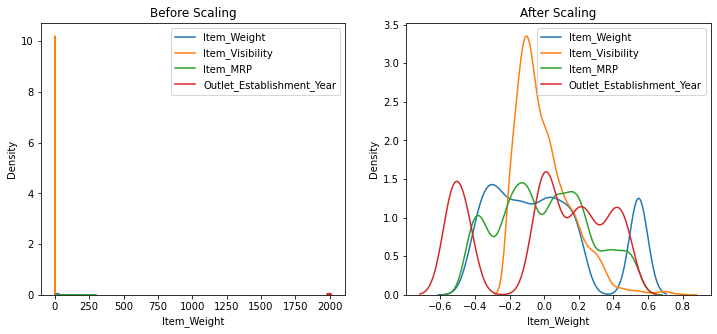

In [69]:
# Visualizing the variable distribution before and after scaling
# Item_Weight, Item_Visibility, Item_MRP, Outlet_Establishment_Year

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train_student_final_premodel_version['Item_Weight'], ax=ax1, label ='Item_Weight')
sns.kdeplot(X_train_student_final_premodel_version['Item_Visibility'], ax=ax1, label ='Item_Visibility')
sns.kdeplot(X_train_student_final_premodel_version['Item_MRP'], ax=ax1, label ='Item_MRP')
sns.kdeplot(X_train_student_final_premodel_version['Outlet_Establishment_Year'], ax=ax1, label ='Outlet_Establishment_Year')
ax1.legend()

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Item_Weight'], ax=ax2, label ='Item_Weight')
sns.kdeplot(X_train_scaled['Item_Visibility'], ax=ax2, label ='Item_Visibility')
sns.kdeplot(X_train_scaled['Item_MRP'], ax=ax2, label ='Item_MRP')
sns.kdeplot(X_train_scaled['Outlet_Establishment_Year'], ax=ax2, label ='Outlet_Establishment_Year')
ax2.legend()
plt.show()

In [70]:
X_train_student_final_premodel_version.isnull().mean()

Item_Weight                      0.0
Item_Visibility                  0.0
Item_MRP                         0.0
Outlet_Establishment_Year        0.0
Item_Identifier_NCP05            0.0
                                ... 
Outlet_Location_Type_Tier 1      0.0
Outlet_Type_Grocery Store        0.0
Outlet_Type_Supermarket Type2    0.0
Outlet_Type_Supermarket Type1    0.0
Outlet_Type_Supermarket Type3    0.0
Length: 1586, dtype: float64

### Step 8: Linear Regression Modelling (part 1) <a id="firstModel"></a>

[back to report](#LinearRegressionModel)

Linear regression is defined as a machine learning model in which the model finds the best fit linear line between the independent and dependent variables in which the aim is to find the best fit linear line and the optimal values of intercept and coefficients such that errors are minimized. For the purpose of this analysis, the goal is to use the X variables e.g. columns other than item outlet sales,to predict the item outlet sales (y variable, or target variable).
### Building and Evaluating the Model
In order to evaluate the model performance of a linear regression model, a range of measures can be used, but in this ASG1 we will focus on only 2:

- Root Mean Square Error (RMSE): The RMSE is the square root of the variance of the residuals, that is, the squared differences between prediction and actual observation. Lower values of RMSE indicate better fit and model performance.
- R-Square: R-square represents the percentage of the response variable variation that is explained by a linear model. The closer to 1.0 the value of R-square, the more indicative of a better fit and model performance.

In [71]:
# assign your fully cleaned and transformed data contained within your versions of 
# X_train_student_final_premodel_version, X_test_student_final_premodel_version,
# y_train_student_final_premodel_version and y_test_student_final_premodel_version into
# the prepared variables below, for a simple linear regression model

In [72]:
X_train_final = X_train_student_final_premodel_version
X_test_final = X_test_student_final_premodel_version

y_train_final = y_train_student_final_premodel_version
y_test_final = y_test_student_final_premodel_version

In [73]:
X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5835 entries, 7569 to 2799
Columns: 1586 entries, Item_Weight to Outlet_Type_Supermarket Type3
dtypes: float64(3), int32(1582), int64(1)
memory usage: 35.6 MB


In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [75]:
# Build Linear Regression Model
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_final, y_train_final)

# Evaluate the Linear Regression Model using Root Mean Square Error (RMSE)
print('train_rmse:', mean_squared_error(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_rmse:', mean_squared_error(y_test_final, model_linear_regression.predict(X_test_final)))

# Evaluate the Linear Regression Model using R-Square
# The closer the r-square value to 1, the better the model performance
print('train_r-sq:', r2_score(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_r-sq:', r2_score(y_test_final, model_linear_regression.predict(X_test_final)))

train_rmse: 716193.5458400421 
 test_rmse: 1.989595274285792e+22
train_r-sq: 0.6844485858267564 
 test_r-sq: -8789020318880263.0


### Step 7: Feature Engineer

#### Using Standardization from sklearn <a id="standardization"></a>

[back to report](#FeatureEngineer)

In [76]:
# set up the scaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train_student_final_premodel_version)

# transform train and test sets
X_train_scaled = scaler.transform(X_train_student_final_premodel_version)
X_test_scaled = scaler.transform(X_test_student_final_premodel_version)

In [77]:
# the scaler stores the mean of the features, learned from train set

scaler.mean_

array([1.55776827e+01, 6.62530290e-02, 1.38819420e+02, ...,
       1.11053985e-01, 6.55184233e-01, 9.94001714e-02])

In [78]:
# the scaler stores the standard deviation deviation of the features,
# learned from train set

scaler.scale_

array([7.27984150e+00, 5.19329482e-02, 6.15674422e+01, ...,
       3.14198977e-01, 4.75308167e-01, 2.99198558e-01])

In [79]:
# transform the returned NumPy arrays to dataframes

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_student_final_premodel_version.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_student_final_premodel_version.columns)

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

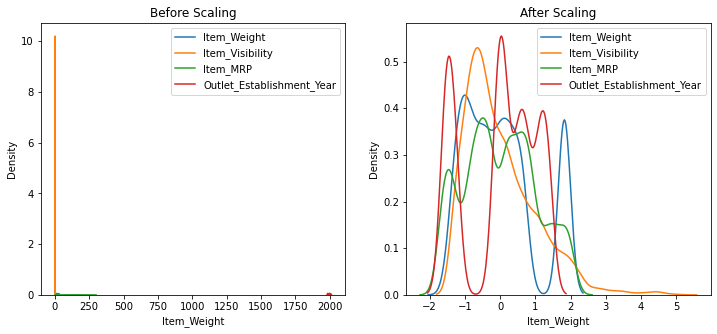

In [81]:
# let's compare the variable distributions before and after scaling
# Item_Weight, Item_Visibility, Item_MRP, Outlet_Establishment_Year
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train_student_final_premodel_version['Item_Weight'], ax=ax1, label ='Item_Weight')
sns.kdeplot(X_train_student_final_premodel_version['Item_Visibility'], ax=ax1, label ='Item_Visibility')
sns.kdeplot(X_train_student_final_premodel_version['Item_MRP'], ax=ax1, label ='Item_MRP')
sns.kdeplot(X_train_student_final_premodel_version['Outlet_Establishment_Year'], ax=ax1, label ='Outlet_Establishment_Year')
ax1.legend()

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Item_Weight'], ax=ax2, label ='Item_Weight')
sns.kdeplot(X_train_scaled['Item_Visibility'], ax=ax2, label ='Item_Visibility')
sns.kdeplot(X_train_scaled['Item_MRP'], ax=ax2, label ='Item_MRP')
sns.kdeplot(X_train_scaled['Outlet_Establishment_Year'], ax=ax2, label ='Outlet_Establishment_Year')
ax2.legend()
plt.show()

In [82]:
X_train_student_final_premodel_version.isnull().mean()

Item_Weight                      0.0
Item_Visibility                  0.0
Item_MRP                         0.0
Outlet_Establishment_Year        0.0
Item_Identifier_NCP05            0.0
                                ... 
Outlet_Location_Type_Tier 1      0.0
Outlet_Type_Grocery Store        0.0
Outlet_Type_Supermarket Type2    0.0
Outlet_Type_Supermarket Type1    0.0
Outlet_Type_Supermarket Type3    0.0
Length: 1586, dtype: float64

### Step 8: Linear Regression Modelling (part 2) <a id="secondModel"></a>

[back to report](#LinearRegressionModel)

In [83]:
X_train_final2 = X_train_student_final_premodel_version
X_test_final2 = X_test_student_final_premodel_version

y_train_final2 = y_train_student_final_premodel_version
y_test_final2 = y_test_student_final_premodel_version

In [84]:
# Build Linear Regression Model
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_final2, y_train_final2)

# Evaluate the Linear Regression Model using Root Mean Square Error (RMSE)
# The lower MAE, the better the model performance
print('train_rmse:', mean_squared_error(y_train_final2, model_linear_regression.predict(X_train_final2)), 
      '\n test_rmse:', mean_squared_error(y_test_final2, model_linear_regression.predict(X_test_final2)))

# Evaluate the Linear Regression Model using R-Square
# The closer the r-square value to 1, the better the model performance
print('train_r-sq:', r2_score(y_train_final2, model_linear_regression.predict(X_train_final2)), 
      '\n test_r-sq:', r2_score(y_test_final2, model_linear_regression.predict(X_test_final2)))

train_rmse: 716193.5458400421 
 test_rmse: 1.989595274285792e+22
train_r-sq: 0.6844485858267564 
 test_r-sq: -8789020318880263.0


# Assignment 1 Report - Chloe Lim Jiexi_S10223281K

In [ ]:
# Overview <a id="Overview"></a>
#### 1. [Introduction: Problem Understanding](#Introduction)

#### 2. [Explore the Data](#Exploration)
- the relationship between different variables / features 

#### 3. [Cleanse the Data](#CleansingData) 
- Missing Data
- Outliers

#### 4. [Data Transformation](#DataTransformation) 
- Categorical Data
- Numerical Data

#### 5. [Feature Engineer](#FeatureEngineer)
- Feature Scaling
- Create new features / Drop features

#### 6. [Linear Regression Model](#LinearRegressionModel) 
- Build and Evaluate the model

#### 7. [Summary and Further Improvements](#Summaries)
- summary of findings
- explanation of the possible further improvments

In [ ]:
## Introduction: Problem Understanding <a id="Introduction"></a>

The data “supermarket.csv” have been collected at different supermarket outlets and stores in various cities, 
with the aim of predicting the sales of each product at a particular outlet. The supermarket management team will 
then try to understand the properties of the products and outlets which plays a key role in increasing the sales. 
The variable Item_Outlet_Sales, which is the sales dollar amount of the product in the particular store, is the target 
variable for this analysis.

This jupyter report will make use of methods such as :
    
Method |
--- |
Loading data |
Data Preprocessing |
train_test_split |
Missing value imputation |
Categorical data encoding |
Variable discretization/binning |
Feature engineer |
Linear regression modelling |
    
 
To help analysis the different variables provided to predict the sales of each 
product at a particular outlet. 


## Explore the Data <a id="Exploration"></a>
After loading the data into a DataFrame variable, I used functions such as data.head(), data.info(), data.describe() 
to have an overview of the DataFrame variable. There are 12 columns in total and I noticed that the dataframe varibale 
contains data of various types. The various types are:
    
Data Type | Count of Type (Cols)
--- | ---
float(64) | 4
int(64) | 1
object | 7
    
I then found the numerical and categorical variables respectively and found whether they contained null values by 
using the functions isnull().mean().sort_values() for both numerical and categorical variables, where I found  
variables Item_Weight and Outlet_Size containing null values. Item_Weight has a null mean value of 0.171653 and 
Outlet_Size has a null mean value of 0.282764. 


Afterwards, by using the histogram to see the distribution of the numerical variables, variables such as 
Item_Visibility and Item_Outlet_Sales are right-skewed and variable Item_Weight is bimodal distributed. 
The variable Item_MRP is somewhat symmetrical and the variable Outlet_Establishment_Year can be inferred as 
either somewhat consistent or anomaly. Below is a table to see clearer the different type of distribution for each 
variable. 

Variable | Type of Distribution
--- | ---
Item_Visibility | right-skewed
Item_Outlet_Sales | right - skewed
Item_Weight | bimodal
Item_MRP | symmetrical
Outlet_Establishment_Year | consistent / anomaly

In addition, there are numerical variables that needed to transform using proper transformation methods such as 
Log transformation and Box-Cox, which would be specified [here](#DataTransformation)

In [ ]:
## Cleanse the Data <a id="CleansingData"></a>

### Missing Data
As stated above, after using the functions isnull().mean().sort_values(), I found that for the numerical variables, 
Item_Weight contains null values and for the categorical variables, Outlet_Size has null values. The null values for
each variable are:
    
Variable | Mean of Null values
---|---
Item_Weight | 0.171136
Outlet_Size | 0.281763

For Item_Weight, a numerical variable, I used the End Tail imputation method from Feature Engine. To do so, I created 
a median imputer for the variable using the EndTailImputer function, imported from feature_engine.impurtation. 
Afterwards, I used imputer.imputer_dict_ to find the dictionary with the mapping for the variable, which has a result 
of {'Item_Weight': 28.838750000000005}. I then transform the data into the train test set and checked that the null 
values were replaced.  

For Outlet_Size, a categorical variable, I used the frequent category imputation with pandas method. To do so, 
I used a for lop and a fillna function. And then I used is.null().mean() to checked that the null values were replaced. 

### Outliers
By using box plots, I found that there were 2 numerical variables with outliers. 
They are Item_Visibility and Item_Outlet_Sales. Using a user-define function, find_boundaries, 
I found the upper limit and lower limit for the 2 variables. 

The upper limit for the variables: 

Item_Visibility | Item_Outlet_Sales
---|---
0.195979015 | 6501.8699

The lower limit for the variables:

Item_Visibility | Item_Outlet_Sales
---|---
-0.0744042450 | -2566.3261


## Data Transformation <a id="DataTransformation"></a>
For data transformation, I used one-hot encoding to encode the categorical data and a few transformations method for 
numerical data, along with binning.

### Categorical Data <a id="CategoricalData"></a>
For [categorical data](#CategoricalDataRunThrough), I used the one hot encoder method to encode the categorical data. From feature_engine.encoding, 
I imported OneHotEncoder and fit to my X_train. Afterwards, I used the function ohe_enc.variables_ to see which 
variables will be encoded, which are Item_Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Size, 
Outlet_Location_Type and Outlet_Type.

Varibles to be encoded:
    
Variable |
---|
Item_Identifier | 
Item_Fat_Content | 
Item_Type | 
Outlet_Identifier | 
Outlet_Size | 
Outlet_Location_Type|
Outlet_Type |

Next, I used the function ohe_enc.transform() to transform my X_train and X_test. 
I then used X_train_student_final_premodel_version.head() and X_test_student_final_premodel_version.head() 
to see the first 5 rows of the respective tables. As shown by the table, later continue…  

### Numerical Data <a id="NumericalData"></a>
Seeing the distribution and the heat map of the numerical variables, I used Cube root, reciprocal, and 
box-cox transformation to transform the numerical variables, Item_Visibility and Item_MRP. 

For the [first transformation](#FirstTransformation), I used Cube root transformations with feature engine to transform the variable 
Item_Visibility. I was unable to transform Item_Visibility using the other transformation such as Reciprocal and 
Logarithmic due to having 0 as a value. The original distribution of Item_Visibility was rightly skewed and hence not 
a normal distribution. In addition, the line graph is not really following the red guiding line. And after the Cube 
root transformation, the distribution of Item_Visibility is somewhat normal, with one bar chart at the value 0.0, as 
shown by the bar chart. The line in the line graph become straighter, following the red guiding line but with a 
horizontal line on the near bottom. 

For the [second transformation](#SecondTransformation), I used Reciprocal transformations with feature engine to transform the variable 
Item_MRP. The original distribution of Item_MRP is somewhat symmetrical and hence not a normal distribution. 
Furthermore, the line graph is not following the guiding line and as an S shape. And after the Reciprocal 
transformation, the distribution of Item_MRP became rightly skewed. The line in the line graph only become steeper 
and still has the S shape. 

For the [last transformation](#LastTransformation), I used Box-Cox transformations with feature engine to also transform the variable 
Item_MRP. With the original distribution of Item_MRP is somewhat symmetrical, it is not a normal distribution, 
along with the line graph having an S shape. And after the Box-Cox transformation, the distribution of Item_MRP 
is still somewhat symmetrical as shown by the bar chart.  The line graph remains the same as before the Box-Cox 
transformation. 
    
In addition to the above transformation, I also did binning or variable discretization using the equal-width discretizer
method. I did binning for 4 numerical variables, which are 
[Item_MRP](#ItemMRP), 
[Outlet_Establishment_Year](#OutletYear), 
[Item_Visibility](#ItemVisibility), and 
[Item_Weight](#ItemWeight). 
    
To start off, I set up an equal-width discretizer into 10 intervals, and the interval limits are stored in the 
bin_edges_attribute, using the function: disc.bin_edges_. Then, I transformed the train set, where Sklearn will return 
NumPy arrays. And I repeat the same thing for the test set. Now I visualize the distribution of the train test set. 
If the distributions in the train test set are similar, we should expect similar proportion of observations in the 
different intervals in the train and test set. 
    
Variable | Similar Proportion (Y/N)
---|---
Item_MRP | Y
Outlet_Establishment_Year | Y
Item_Visibility | N
Item_Weight | N

Therefore, we can conclude that Item_MRP and Outlet_Establishment_Year have similar proportions and thus their 
distributions are similar. However, Item_Visibility and Item_Weight do not have similar proportions and thus their 
distributions are not similar. 

In [ ]:
## Feature Engineer <a id="FeatureEngineer"></a>

### Feature Scaling
For feature scaling, I used two different methods to see the 
difference in the result. The methods I used are: 
Mean-normalization and Standardization. 

For the [first method](#meanNormal), I used mean-normalization. I made a 
numCols, which includes all numerical variables except for 
the variable Item_Outlet_Sales as I dropped it when I did my 
train test split. I then get the mean of the train set, which
can be found by the function .mean() and the range of the 
train set, which can be calculated by the functions: .max() - .min(). Afterwards, I find the scaled train set by 
having the train set subtracting means and divided by the range of the set. 

Afterwards, using seaborn plots, I visualize the variable 
distribution before and after scaling. In addition, for 
both graphs, there is a legend to help easily identify which 
line represents which variable. For the before graph, there 
is only one orange line visible clearly, which is representing
the variable Item_Visibility. It also has a probability density of 10. Now after scaling, all the lines 
representing all variables are visible. The orange line can be seen to have a higher maximum point than the rest at 
around 3.4 density, and the rest being around 1.5 density. 
    
There is a linear regression model that will be stated at the end. 

For [second method](#standardization), I used standardization from sklearn. I started by setting up the scaler using the equation scaler 
= StandardScaler() and fit the scaler to the train set, so that it will learn the parameters. And then I transformed 
the train and test sets by using the function, scaler.transform(). The scaler stores the mean of the features, 
which is learned from the train set and by using the function, scaler.mean_, you can see the means stored in the 
scaler. In addition, the scaler also stored the standard deviation of the features, learned from the train set, 
and using the function scaler.scale_ can see the standard deviation stored in the scaler. Then afterwards, I transformed
the returned NumPy arrays to dataframes. 
    
Afterwards, similar to the first method, I used seaborn plots to visualization the distributions to compare the before 
and after scaling. With the legends beside each graph to help easily identify which line represents which variable. 
Before the scaling, the orange line representing Item_Visibility is the most obvious line with a density of around 10. 
After the scaling, all of the lines are visible. The red line representing Outlet_Establishment_Year has one of the 
highest maximum point, at higher than 0.5 for probability density. The orange line representing Item_Visbility has the 
second highest maximum point at around 0.5. The green line representing Item_MRP has the lowest maximum point for 
probability density, at around 0.35. 
    
There is also a linear regression model that will be stated at the end. 

### Create new features / Drop features
I made a new numCols to include all the numerical variables: 
Item_Weight, Item_Visibility, Item_MRP and 
Outlet_Establishment_Year as I dropped Item_Outlet_Sales 
during the train test split and my code did not manage to run
if I did not made a numCols. 

## Linear Regression Model <a id="LinearRegressionModel"></a>

In order to evaluate the model performance of a linear regression model, there is a variety of measures that can be 
used. However, in this report the two measures used are Root Mean Square Error (RMSE) and R-Square. 

RMSE is the square root of the variance of the residuals, which is the squared differences between prediction and actual
observation. The lower the values of RMSE are, the better the fit and model performance. R-Square represents the 
percentage of the response variable variation that is explained by a linear model. The closer the value of R-Square is 
to 1.0, the better the fit and model performance. 

For the [first model](#firstModel) for the mean-normalization method, I assigned my cleaned and transformed data to the 
prepared variables below, for example: X_train_final. I also a function X_train_final.info() to check that the all the 
data is in numbers or float. After importing the necessary functions, I used the code provided to build my linear 
regression model and have an output of: 
    
Name | Output
---|---
train_rmse |  716193.5458400421
test_rmse | 1.989595274285792e+22
train_r-sq | 0.6844485858267564
test_r-sq | -8789020318880263.0
    
    
However, when I build my [second model](#secondModel) for the standardization method, the output of the model of 
exactly the same as the first one. This could mean that I did not manage to do my train test split properly or did not 
fit the correct data in. The output of the second model is also:
    
Name | Output
---|---
train_rmse |  716193.5458400421
test_rmse | 1.989595274285792e+22
train_r-sq | 0.6844485858267564
test_r-sq | -8789020318880263.0
    

As stated above, for RMSE, the lower the value the better. My value for train_RMSE, is relatively high, which means 
that my model did not perform too great. Next for R-Square, or also indicated as r-sq, the closer the value is to 1.0, 
the better the fit and model performance. My value for train_r-sq is relatively close to 1.0 and is more indicative of 
a better fit and model performance. In addition, these values could mean that I overfitted my train test. 

## Summary and Further improvements <a id="Summaries"></a>

### Summary of findings
The dataset is not cleaned as there were variables with null values and needed transformation. By encoding the categorical
variables and transformation the numerical variables, I managed to get a value of 716193.5 for train_mse for the linear
regression model and 0.684448 for train_r-sq. 
In conclusion, from both my TIBCO and jupyter notebook, my findings are that the various variables does 
necessary affect the variable Item_Outlet_Sales.

### Explanation of possible further improvements
As shown by the outputs of my linear regression model, I have most likely overfitting my train test split. 
Hence, to prevent overfitting, I can try cross-validation, removing some features or regularization. 
Cross-validation is a powerful preventive measure against overfitting. 
It is done by using the initial training data to generate multiple mini train-test splits and using these to adjust the 
model. In addition, I can also manually remove some of the irrelevant input features in my coding. 
Lastly, regularization refers to a broad range of techniques for artificially forcing the model to be simpler. 